In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('EV_Grid_Dataset.csv')
df

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method
0,2024-01-01 00:00:00,India,Western India,IN-WE,702.48,760.73,6.76,2.76,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
1,2024-01-01 01:00:00,India,Western India,IN-WE,703.89,762.23,6.57,2.76,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
2,2024-01-01 02:00:00,India,Western India,IN-WE,704.12,762.52,6.54,2.91,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
3,2024-01-01 03:00:00,India,Western India,IN-WE,703.69,762.15,6.60,3.15,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
4,2024-01-01 04:00:00,India,Western India,IN-WE,704.27,762.79,6.52,3.20,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,India,Western India,IN-WE,686.39,742.67,9.34,4.74,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
8780,2024-12-31 20:00:00,India,Western India,IN-WE,685.06,741.25,9.51,4.78,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
8781,2024-12-31 21:00:00,India,Western India,IN-WE,684.24,740.37,9.62,4.82,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN
8782,2024-12-31 22:00:00,India,Western India,IN-WE,684.04,740.15,9.64,4.90,Electricity Maps Estimation,True,ESTIMATED_MODE_BREAKDOWN


In [33]:
df.isnull().sum()

Datetime (UTC)                              0
Country                                     0
Zone name                                   0
Zone id                                     0
Carbon intensity gCO₂eq/kWh (direct)        0
Carbon intensity gCO₂eq/kWh (Life cycle)    0
Carbon-free energy percentage (CFE%)        0
Renewable energy percentage (RE%)           0
Data source                                 0
Data estimated                              0
Data estimation method                      0
dtype: int64

In [34]:
df.describe()

,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%)
count,8784.000000,8784.000000,8784.000000,8784.000000
mean,677.112007,734.999227,9.626326,6.195318
std,25.756952,26.729425,3.288403,3.017384
min,582.200000,635.430000,3.920000,1.640000
25%,662.140000,719.597500,7.070000,3.880000
50%,680.610000,738.830000,9.200000,5.650000
75%,697.362500,755.995000,11.440000,7.900000
max,727.220000,786.170000,22.590000,18.030000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            8784 non-null   object 
 1   Country                                   8784 non-null   object 
 2   Zone name                                 8784 non-null   object 
 3   Zone id                                   8784 non-null   object 
 4   Carbon intensity gCO₂eq/kWh (direct)      8784 non-null   float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  8784 non-null   float64
 6   Carbon-free energy percentage (CFE%)      8784 non-null   float64
 7   Renewable energy percentage (RE%)         8784 non-null   float64
 8   Data source                               8784 non-null   object 
 9   Data estimated                            8784 non-null   bool   
 10  Data estimation method              

In [36]:
df.shape

(8784, 11)

In [37]:
#Rename Columns
df = df.rename(columns={
    "Datetime (UTC)": "timestamp",
    "Carbon intensity gCO₂eq/kWh (direct)": "ci_direct",
    "Carbon intensity gCO₂eq/kWh (Life cycle)": "ci_lifecycle",
    "Carbon-free energy percentage (CFE%)": "cfe_pct",
    "Renewable energy percentage (RE%)": "re_pct",
    "Data estimated": "is_estimated"
})

In [38]:
# Convert timestamp 
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Sort chronologically 
df = df.sort_values("timestamp").reset_index(drop=True)

In [39]:
df = df.drop(columns=[
    "Country",
    "Zone name",
    "Zone id",
    "Data source",
    "Data estimation method",
    "is_estimated"
])

In [40]:
df.head()

,timestamp,ci_direct,ci_lifecycle,cfe_pct,re_pct
0,2024-01-01 00:00:00,702.48,760.73,6.76,2.76
1,2024-01-01 01:00:00,703.89,762.23,6.57,2.76
2,2024-01-01 02:00:00,704.12,762.52,6.54,2.91
3,2024-01-01 03:00:00,703.69,762.15,6.60,3.15
4,2024-01-01 04:00:00,704.27,762.79,6.52,3.20


In [41]:
df.tail()

,timestamp,ci_direct,ci_lifecycle,cfe_pct,re_pct
8779,2024-12-31 19:00:00,686.39,742.67,9.34,4.74
8780,2024-12-31 20:00:00,685.06,741.25,9.51,4.78
8781,2024-12-31 21:00:00,684.24,740.37,9.62,4.82
8782,2024-12-31 22:00:00,684.04,740.15,9.64,4.90
8783,2024-12-31 23:00:00,686.04,742.30,9.38,4.95


In [42]:
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["month"] = df["timestamp"].dt.month


In [43]:
LAGS = [1, 2, 3, 6, 12, 24]

for lag in LAGS:
    df[f"ci_lag_{lag}"] = df["ci_direct"].shift(lag)

In [44]:
df["ci_roll_6"] = df["ci_direct"].rolling(window=6).mean()
df["ci_roll_24"] = df["ci_direct"].rolling(window=24).mean()


In [45]:
df = df.dropna().reset_index(drop=True)

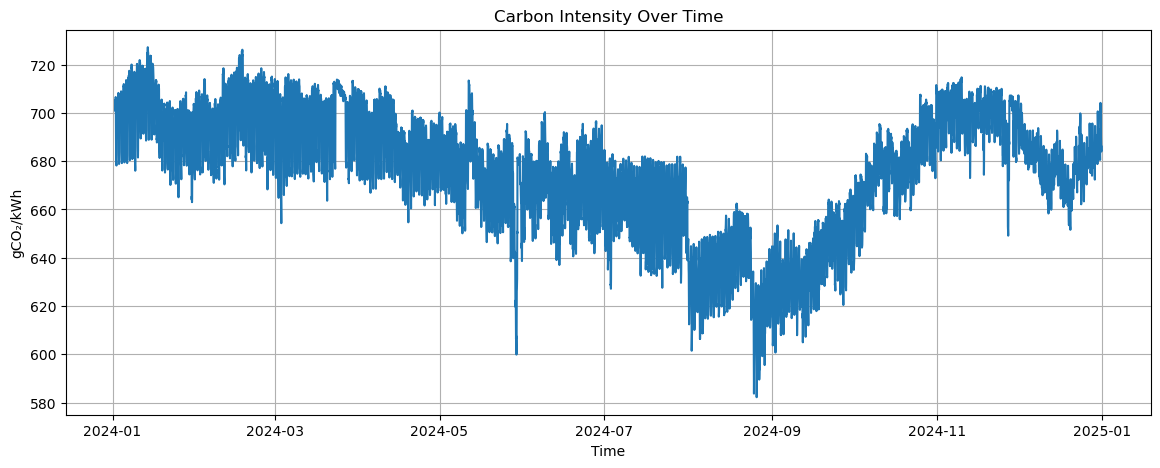

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df["timestamp"], df["ci_direct"])
plt.title("Carbon Intensity Over Time")
plt.xlabel("Time")
plt.ylabel("gCO₂/kWh")
plt.grid(True)
plt.show()


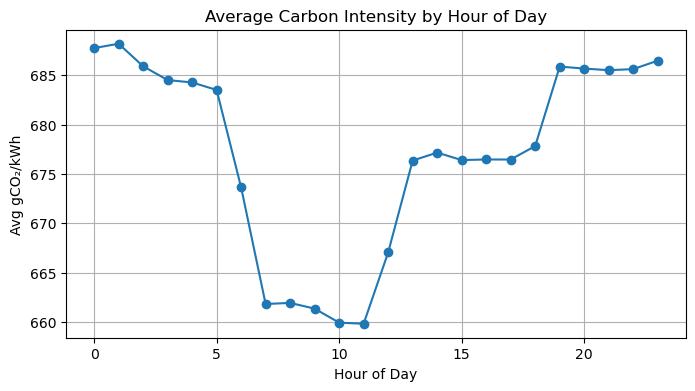

In [47]:
#Visualization carbon intensity hourly
hourly_avg = df.groupby("hour")["ci_direct"].mean()

plt.figure(figsize=(8,4))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o")
plt.title("Average Carbon Intensity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg gCO₂/kWh")
plt.grid(True)
plt.show()


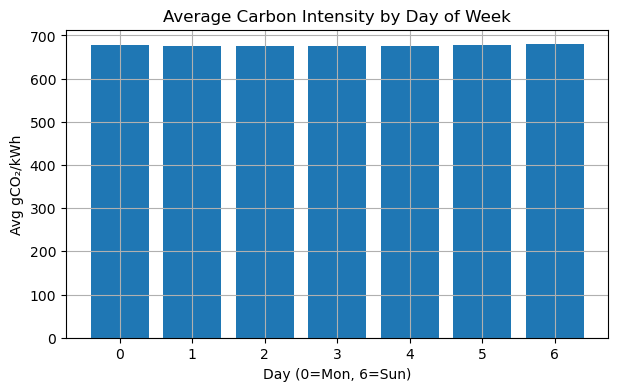

In [48]:
dow_avg = df.groupby("day_of_week")["ci_direct"].mean()

plt.figure(figsize=(7,4))
plt.bar(dow_avg.index, dow_avg.values)
plt.title("Average Carbon Intensity by Day of Week")
plt.xlabel("Day (0=Mon, 6=Sun)")
plt.ylabel("Avg gCO₂/kWh")
plt.grid(True)
plt.show()


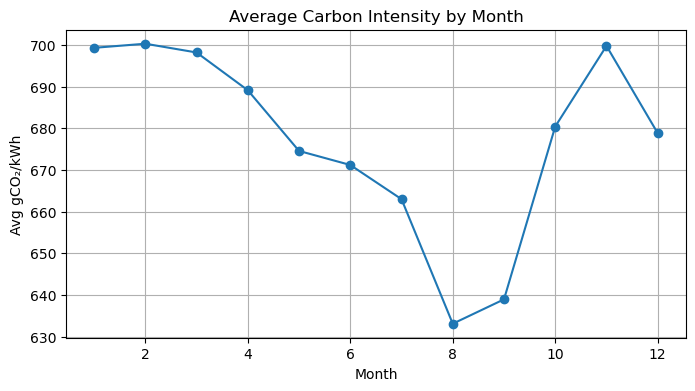

In [49]:
monthly_avg = df.groupby("month")["ci_direct"].mean()

plt.figure(figsize=(8,4))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o")
plt.title("Average Carbon Intensity by Month")
plt.xlabel("Month")
plt.ylabel("Avg gCO₂/kWh")
plt.grid(True)
plt.show()


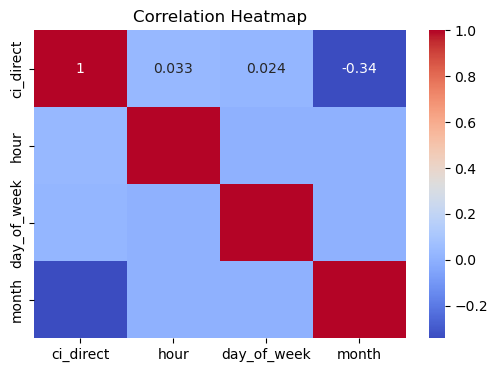

In [50]:
import seaborn as sns

corr_cols = [
    "ci_direct",
    "hour",
    "day_of_week",
    "month"
]

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [51]:
 y = df["ci_direct"]


FEATURES = [
    
# Time
    "hour",
    "day_of_week",
    "month",

# Lagged carbon intensity
   "ci_lag_1",
   "ci_lag_2",
   "ci_lag_3",
   "ci_lag_6",
   "ci_lag_12",
   "ci_lag_24",

# Rolling stats
    "ci_roll_6",
    "ci_roll_24"
 ]

X = df[FEATURES]


In [52]:
#defining training testing manually as shuffling is not allowed for time series data
split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]


In [53]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred_lr=model_lr.predict(X_test)
y_pred_lr

array([689.19457132, 687.59966547, 688.2543468 , ..., 683.45292181,
       684.88754657, 686.03668168])

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression MAE:", mae)
print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)


Linear Regression MAE: 2.648958570211784
Linear Regression RMSE: 3.568154825834205
Linear Regression R²: 0.9330527119011763


In [56]:
mse=mean_squared_error(y_test, y_pred_lr)
print("MSE(Mean Squared Error):", mse)

MSE(Mean Squared Error): 12.731728861123925


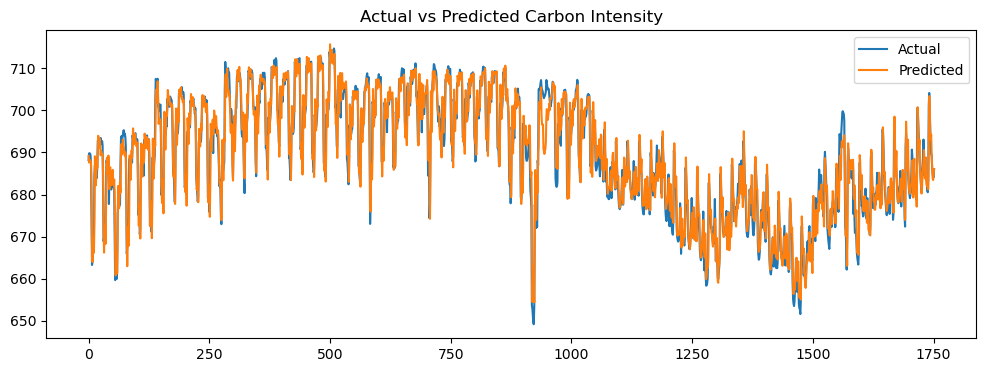

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_lr, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Carbon Intensity")
plt.show()


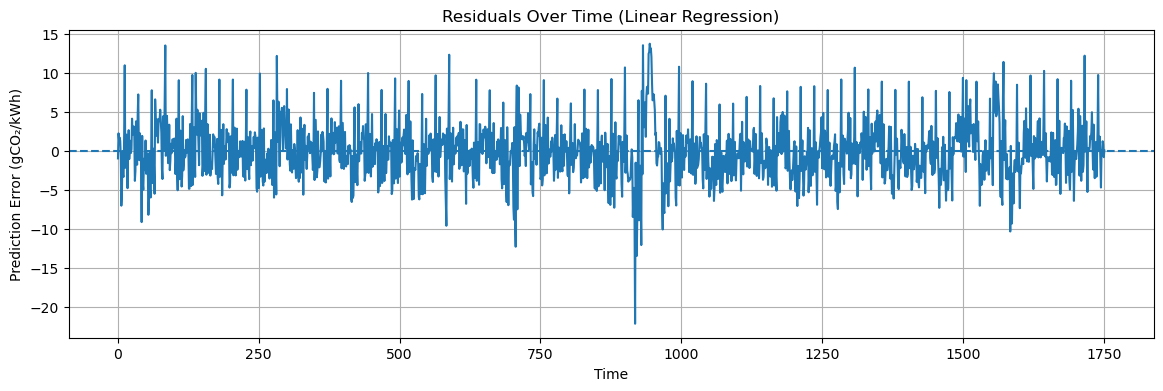

In [58]:
residuals = y_test.values - y_pred_lr

plt.figure(figsize=(14,4))
plt.plot(residuals)
plt.axhline(0, linestyle="--")
plt.title("Residuals Over Time (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Prediction Error (gCO₂/kWh)")
plt.grid(True)
plt.show()


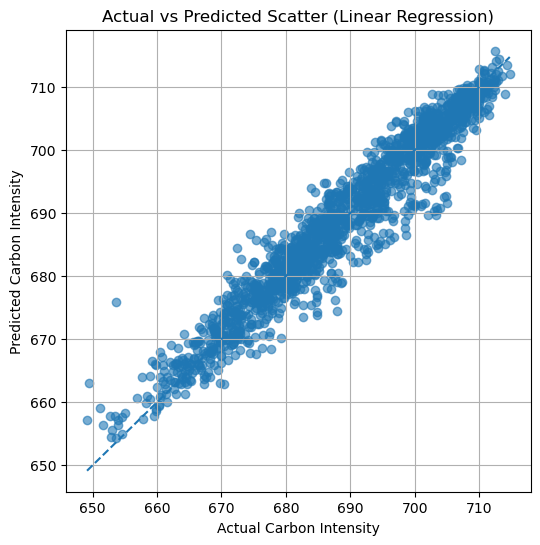

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Carbon Intensity")
plt.ylabel("Predicted Carbon Intensity")
plt.title("Actual vs Predicted Scatter (Linear Regression)")
plt.grid(True)
plt.show()


In [60]:
import joblib

joblib.dump(model_lr, "carbon_intensity_model.pkl")

['carbon_intensity_model.pkl']